In [2]:
!gdown '1dIk7Q7bFaJxoOoHRlzjL66DNBApdgmBB&confirm=t'
!gdown '1hbVTfEoFsga7see4VfYAuLx0t-CVJMsN&confirm=t'

Downloading...
From: https://drive.google.com/uc?id=1dIk7Q7bFaJxoOoHRlzjL66DNBApdgmBB&confirm=t
To: /content/harvard(1).mat
100% 85.8k/85.8k [00:00<00:00, 69.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hbVTfEoFsga7see4VfYAuLx0t-CVJMsN&confirm=t
To: /content/IndianTourism.mat
100% 14.6k/14.6k [00:00<00:00, 16.6MB/s]


In [3]:
import scipy.io
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
mat1 = scipy.io.loadmat('harvard(1).mat')
mat2 = scipy.io.loadmat('IndianTourism.mat')

In [5]:
def pagerank(U,G,p,name):
  plt.title(name)
  plt.spy(G)
  plt.show()
  m,n = np.shape(G)
  c = G.sum(axis=0)                 # computing outdegree
  c = np.asarray(c).reshape(-1)
  b = G.sum(axis=1)                 # computing indegree
  b = np.asarray(b).reshape(-1)
  G = G.toarray()                   #Converting CSC matrix to numpy matrix
  A = np.zeros((m,n))
  for i in range(m):
    for j in range(n):
      if c[j] != 0:
        A[i][j] = p * G[i][j] / c[j] + (1-p)/n
      else:
        A[i][j] = 1/n
  # x= np.random.rand(G.shape[0],1)
  x= np.ones((n,1))
  for l in range(1000):
    x_n = np.linalg.norm(x, ord=1)
    a   = A.dot(x)
    x   = a /x_n
    ratio = np.linalg.norm(a, ord=1)/x_n #Ratio=norm(Axk)/norm(xk)
    if (ratio ==1):
      print(l)
      break
  # d=1
  # while d >= 0.0001: 
  #   norm = np.linalg.norm(x)  
  #   x = x/norm 
  #   x =  np.dot(A,x)
  #   d = 1- norm 
  plt.plot(x)
  plt.title("Page Rank")
  plt.show()
  indices = np.argsort(x,axis=0) # ascending order
  indices = indices[::-1]        # Flipping array
  # print(type(indices),type(U))
  U=U[indices[0:6]].reshape(6,1)
  x=x[indices[0:6]].reshape(6,1)
  # print(U)         # Top 6 websites
  # print(x)         # Page rank of top 6 websites
  # print(c[indices[0:6]])         # Out degree of top 6 websites 
  # print(b[indices[0:6]])         # In degree of top 6 websites
  my_array = np.array([indices[0:6]+np.ones((6,1),dtype=int),x,b[indices[0:6]],c[indices[0:6]],U])
  df = pd.DataFrame(my_array.T.reshape(6,-1), columns = [" ","Page-Rank","In","Out","URL"])
  print(df.set_index(" "))

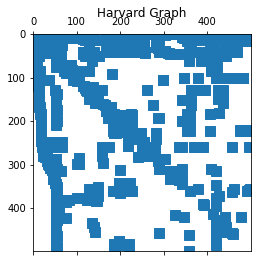

3


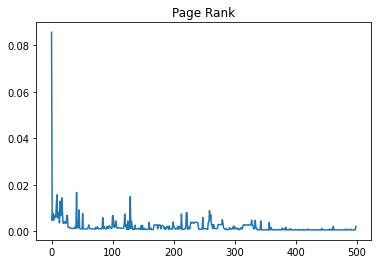

    Page-Rank   In Out                                                URL
                                                                         
1     0.08564  195  26                           [http://www.harvard.edu]
42   0.016699   42   0  [http://search.harvard.edu:8765/custom/query.h...
10    0.01568   21  18                               [http://www.hbs.edu]
130  0.014853   24  12                       [http://www.med.harvard.edu]
18   0.014367   45  46                       [http://www.gse.harvard.edu]
15   0.012947   16  49                       [http://www.hms.harvard.edu]


In [11]:
pagerank(mat1.get('U'),mat1.get('G'),0.85,"Harvard Graph")

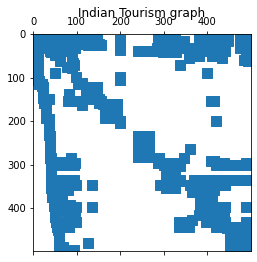

1


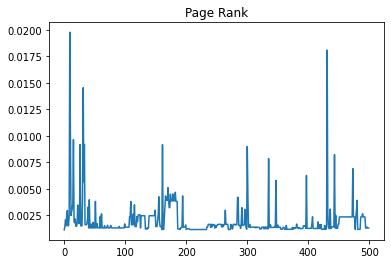

    Page-Rank  In Out                           URL
                                                   
10   0.019776  69   2           [http://www.nic.in]
432  0.018096   7   1  [http://www.makeinindia.com]
32   0.014549  36   0         [http://india.gov.in]
11   0.010146  59  61           [http://cmf.gov.in]
16   0.009635  40   0          [http://drupal.org)]
27   0.009191   3   9        [http://nkn.gov.in/en]


In [10]:
pagerank(mat2.get('U'),mat2.get('G'),0.85,"Indian Tourism graph")